# Exploratory Data Analysis

In [1]:
import os

if os.path.basename(os.getcwd()) != "Musical-Note-Classification":
    os.chdir("../")

print(os.getcwd())

/home/jiawei/Desktop/github/Musical-Note-Classification


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.utils import read_json

In [3]:
data = read_json("nsynth-subtrain/examples.json")

In [4]:
df = pd.DataFrame(data).T
df.head()

,note,sample_rate,pitch,instrument_source,instrument_family_str,instrument_str,note_str,qualities_str,instrument_source_str,velocity,instrument_family,instrument,qualities
bass_synthetic_022-108-127,89262,16000,108,2,bass,bass_synthetic_022,bass_synthetic_022-108-127,"[bright, distortion]",synthetic,127,0,321,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
bass_synthetic_050-108-075,272731,16000,108,2,bass,bass_synthetic_050,bass_synthetic_050-108-075,"[distortion, nonlinear_env]",synthetic,75,0,540,"[0, 0, 1, 0, 0, 0, 1, 0, 0, 0]"
bass_synthetic_057-108-100,284902,16000,108,2,bass,bass_synthetic_057,bass_synthetic_057-108-100,"[distortion, nonlinear_env]",synthetic,100,0,583,"[0, 0, 1, 0, 0, 0, 1, 0, 0, 0]"
bass_synthetic_017-108-050,37332,16000,108,2,bass,bass_synthetic_017,bass_synthetic_017-108-050,[long_release],synthetic,50,0,249,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
bass_synthetic_131-108-100,225176,16000,108,2,bass,bass_synthetic_131,bass_synthetic_131-108-100,"[bright, distortion]",synthetic,100,0,909,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48037 entries, bass_synthetic_022-108-127 to vocal_synthetic_000-010-127
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   note                   48037 non-null  object
 1   sample_rate            48037 non-null  object
 2   pitch                  48037 non-null  object
 3   instrument_source      48037 non-null  object
 4   instrument_family_str  48037 non-null  object
 5   instrument_str         48037 non-null  object
 6   note_str               48037 non-null  object
 7   qualities_str          48037 non-null  object
 8   instrument_source_str  48037 non-null  object
 9   velocity               48037 non-null  object
 10  instrument_family      48037 non-null  object
 11  instrument             48037 non-null  object
 12  qualities              48037 non-null  object
dtypes: object(13)
memory usage: 5.1+ MB


In [6]:
df["note"] = df["note"].astype('int')
df["sample_rate"] = df["sample_rate"].astype('int')
df["pitch"] = df["pitch"].astype('int')
df["instrument_source"] = df["instrument_source"].astype('int')
df["velocity"] = df["velocity"].astype('int')
df["instrument_family"] = df["instrument_family"].astype('int')
df["instrument"] = df["instrument"].astype('int')

In [7]:
df["instrument_family_str"].unique()

array(['bass', 'brass', 'flute', 'guitar', 'keyboard', 'mallet', 'organ',
       'reed', 'string', 'synth_lead', 'vocal'], dtype=object)

## Plot Instrument Families Distribution

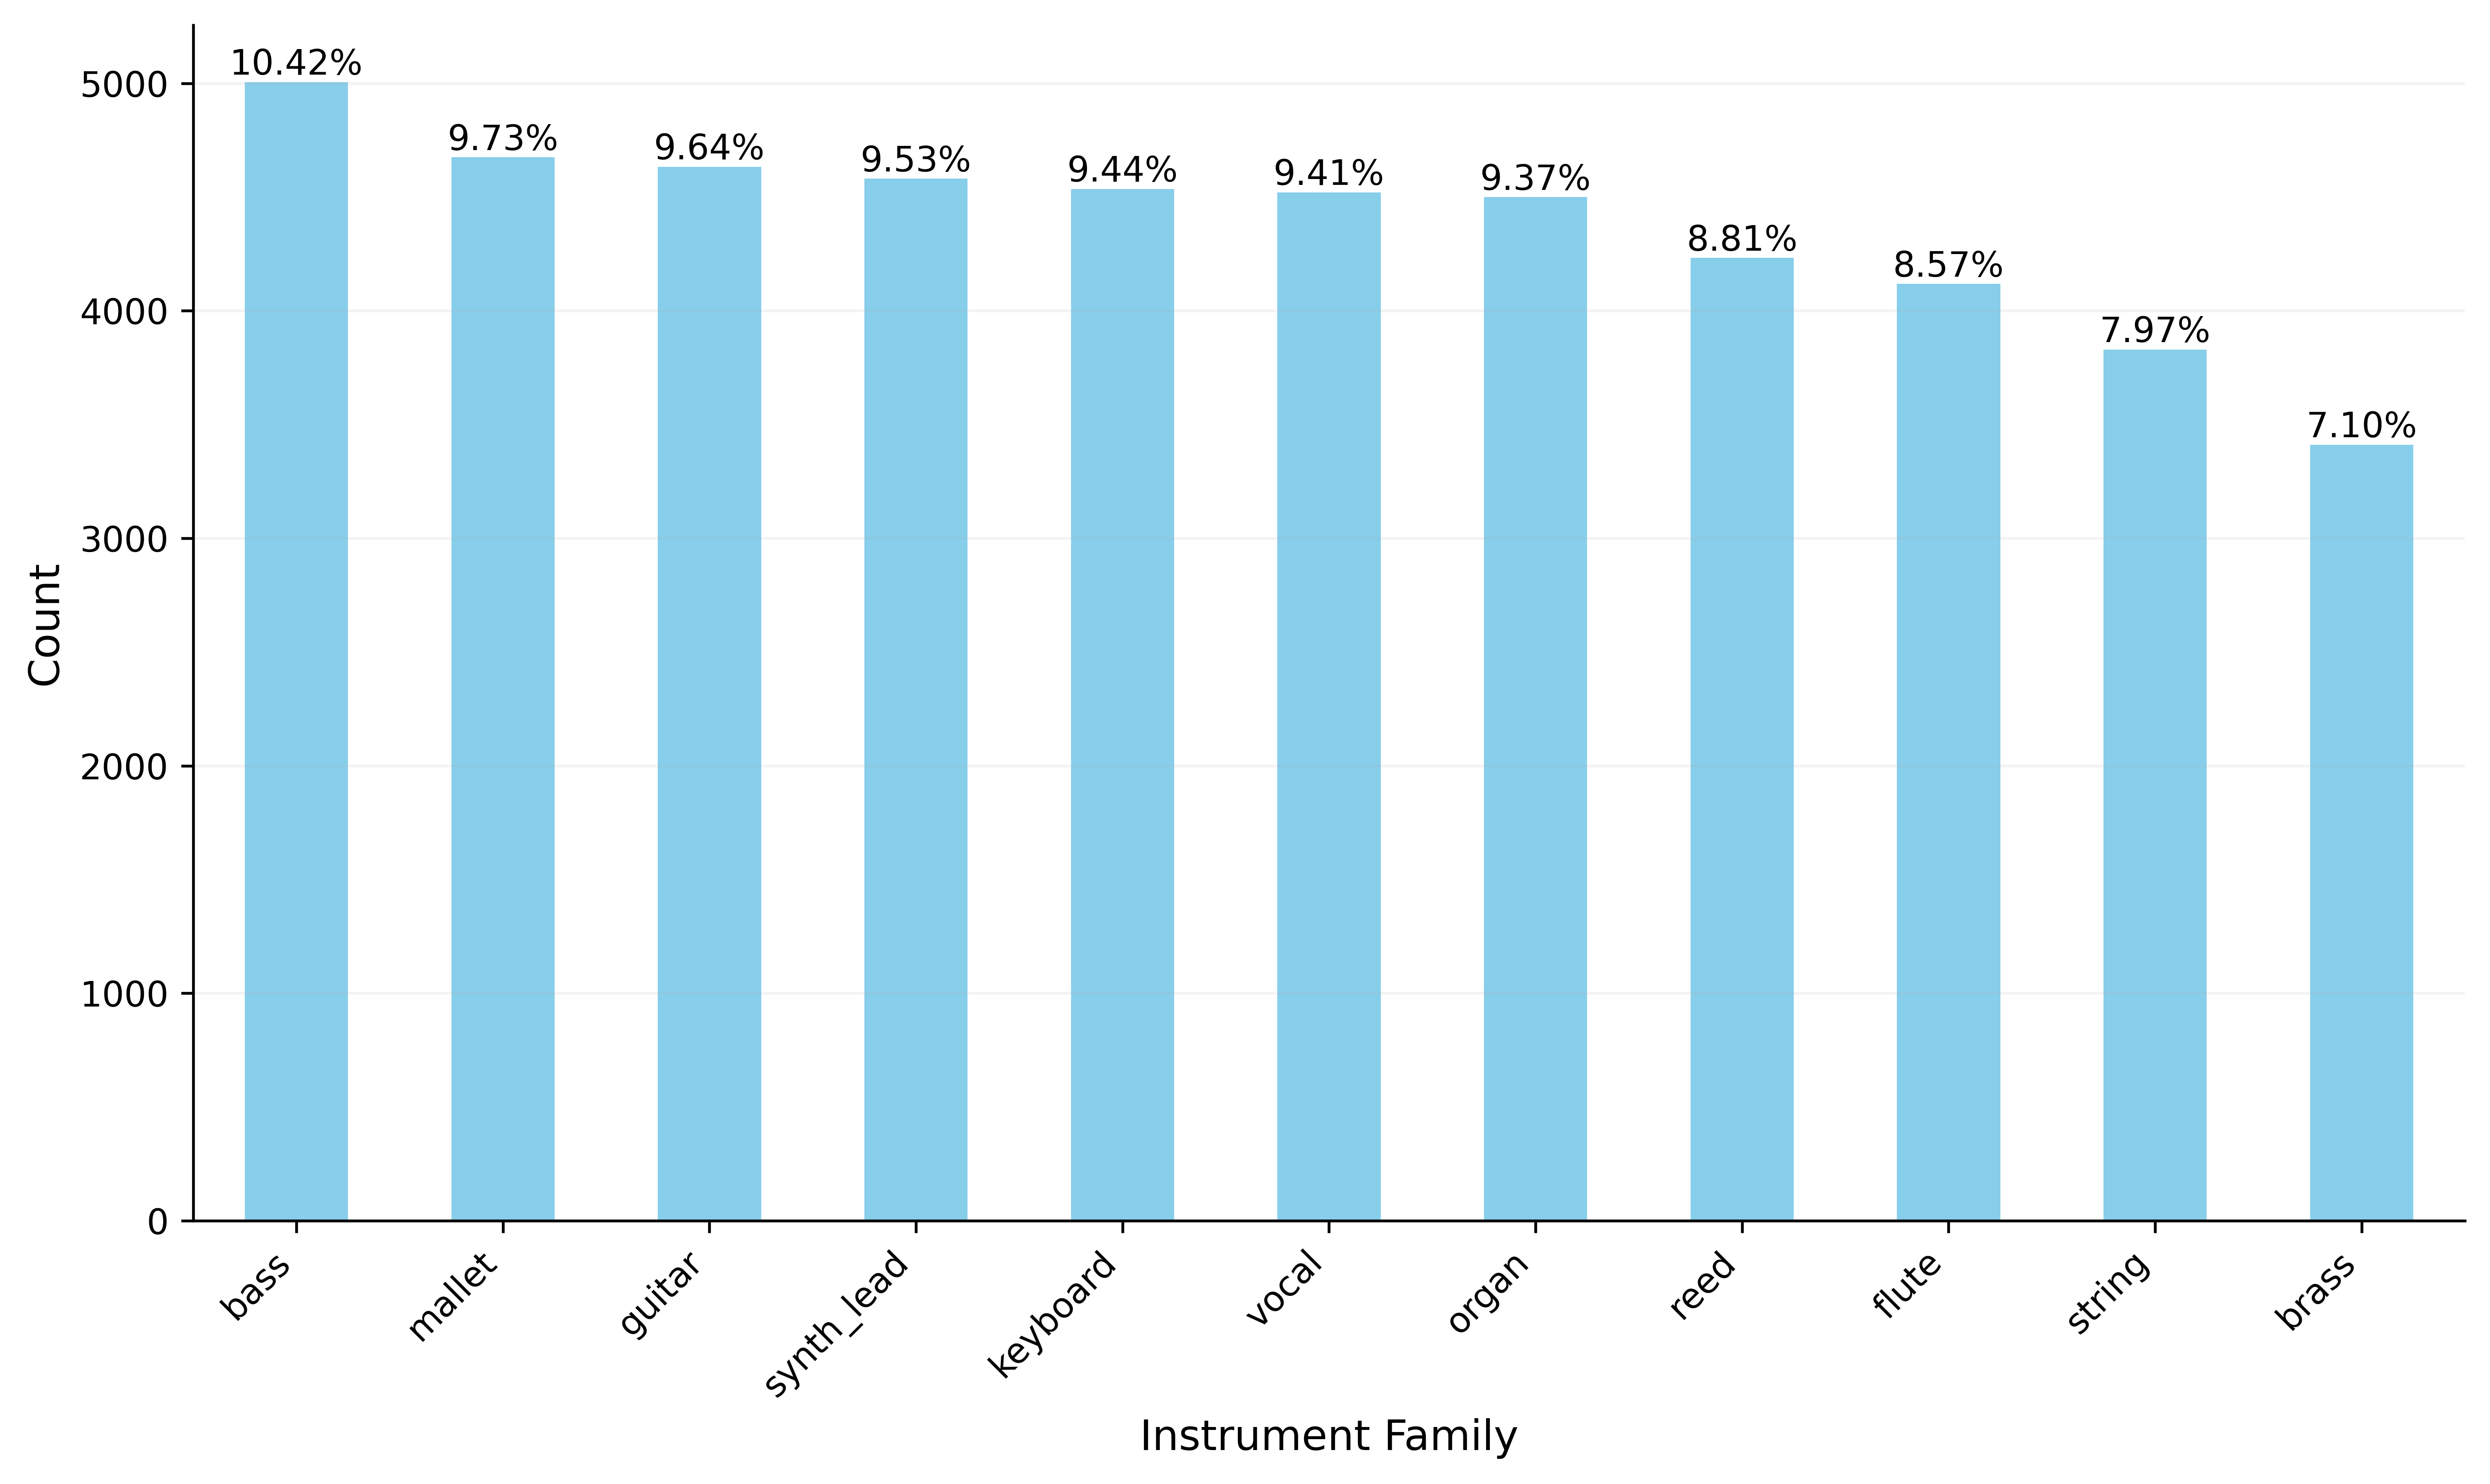

In [8]:
instrument_family_counts = df["instrument_family_str"].value_counts()
instrument_family_total = instrument_family_counts.sum()

plt.figure(figsize=(10, 6), dpi=600)
bars = instrument_family_counts.plot(kind='bar', color='skyblue')

# plt.title('Distribution of Instrument Families', fontsize=16)
plt.xlabel('Instrument Family', fontsize=12)
plt.ylabel('Count', fontsize=12)

for index, value in enumerate(instrument_family_counts):
    plt.text(
        index,
        value + 1,
        f"{value / instrument_family_total * 100:.2f}%",
        ha='center',
        va='bottom',
    )

plt.xticks(rotation=45, ha='right')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(axis='y', linestyle='-', alpha=0.15)

plt.tight_layout()
plt.show()

## Plot Pitch Distribution

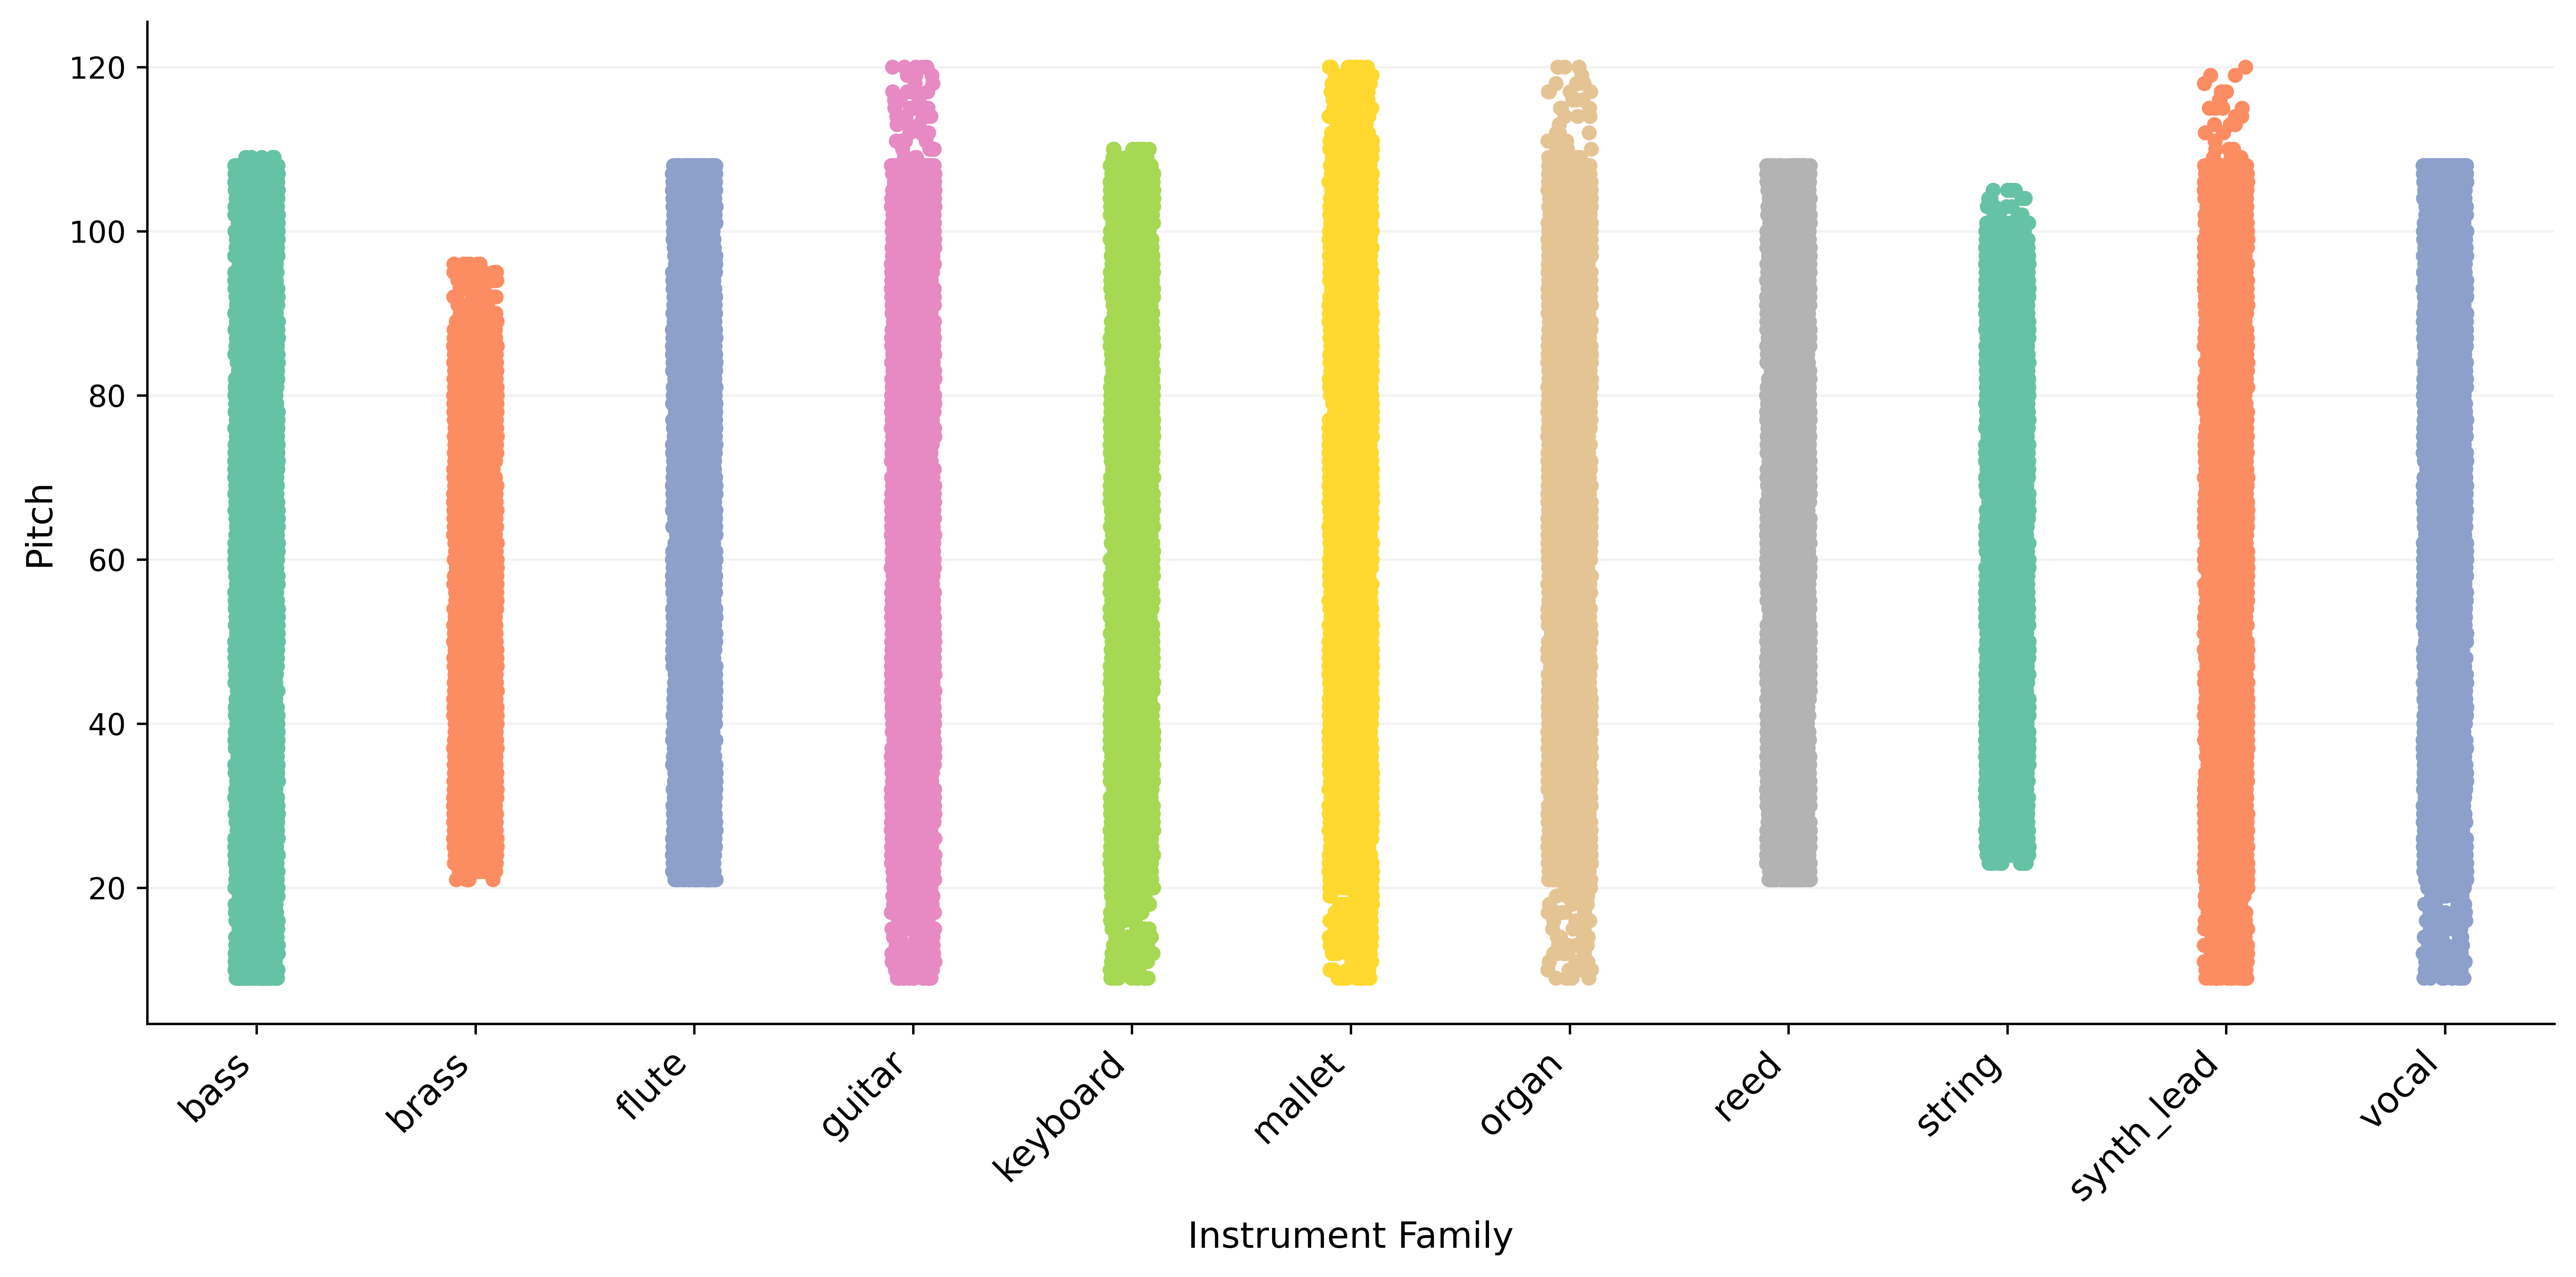

In [9]:
plt.figure(figsize=(12, 6), dpi=600)
sns.stripplot(x='instrument_family_str', y='pitch', data=df, hue='instrument_family_str', jitter=True, palette='Set2', legend=False)

# plt.title('Individual Pitch Points by Instrument', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Instrument Family', fontsize=12)
plt.ylabel('Pitch', fontsize=12)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(axis='y', linestyle='-', alpha=0.15)

plt.tight_layout()
plt.show()

## Select Audio to Visualize Mel-Spectrogram 

In [10]:
np.sort(df[df["instrument_family_str"] == "flute"]["pitch"].unique())

array([ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108])

In [11]:
print(df[(df["instrument_family_str"] == "bass") & (df["pitch"] == 9)]["note_str"].iloc[0])
print(df[(df["instrument_family_str"] == "bass") & (df["pitch"] == 54)]["note_str"].iloc[0])
print(df[(df["instrument_family_str"] == "bass") & (df["pitch"] == 109)]["note_str"].iloc[0])

print(df[(df["instrument_family_str"] == "flute") & (df["pitch"] == 21)]["note_str"].iloc[0])
print(df[(df["instrument_family_str"] == "flute") & (df["pitch"] == 64)]["note_str"].iloc[0])
print(df[(df["instrument_family_str"] == "flute") & (df["pitch"] == 108)]["note_str"].iloc[0])

print(df[(df["instrument_family_str"] == "guitar") & (df["pitch"] == 9)]["note_str"].iloc[0])
print(df[(df["instrument_family_str"] == "guitar") & (df["pitch"] == 64)]["note_str"].iloc[0])
print(df[(df["instrument_family_str"] == "guitar") & (df["pitch"] == 120)]["note_str"].iloc[0])

bass_synthetic_001-009-075
bass_synthetic_116-054-050
bass_synthetic_019-109-025
flute_acoustic_027-021-100
flute_acoustic_003-064-127
flute_synthetic_001-108-127
guitar_electronic_034-009-050
guitar_acoustic_031-064-127
guitar_synthetic_012-120-075
